# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Importing the necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import h5py

# For Data Visualization
import cv2
import seaborn as sns

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers

**Let us check the version of tensorflow.**

In [4]:
# Checking the version of Tensorflow

tf.__version__

'2.12.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [26]:
# Load the .h5 file
file_path = '/content/SVHN_single_grey1.h5'

def print_attrs(name, obj):
    if isinstance(obj, h5py.Dataset):
      print(name)

with h5py.File(file_path, 'r') as hf:
    # hf.visititems(print_attrs)

    X_train = hf['X_train']
    X_train = X_train[:]
    X_test = hf['X_test']
    X_test = X_test[:]
    X_val = hf['X_val']
    X_val = X_val[:]

    y_train = hf['y_train']
    y_train = y_train[:]
    y_test = hf['y_test']
    y_test = y_test[:]
    y_val = hf['y_val']
    y_val = y_val[:]



Check the number of images in the training and the testing dataset.

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((42000, 32, 32),
 (18000, 32, 32),
 (42000,),
 (18000,),
 (60000, 32, 32),
 (60000,))

In [30]:
y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

**Observation:**
1. there are 42000 images of SVHN in the training data set
2. there are 18000 images of SVHN in the testing data set
3. image size is 32 by 32 pixels
4. images are labeled into 10 categories: numbers from 0 - 9
5. there is also train and test validation set containing 60000 images,of sane size, i.e. 32 by 32

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

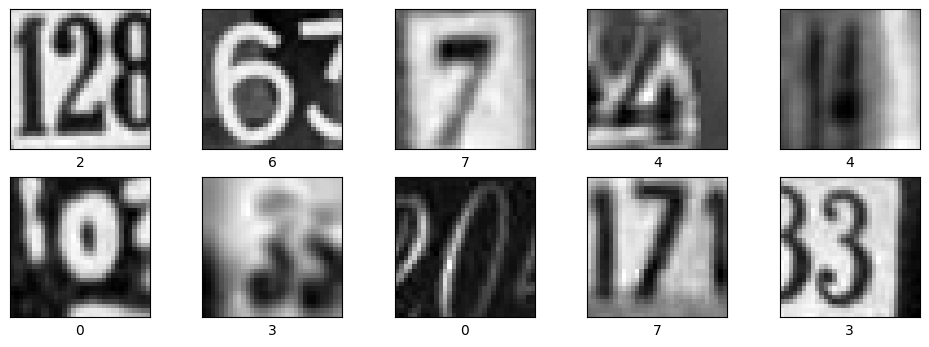

In [152]:
# Let's visualize the dataset

import matplotlib.pyplot as plt

class_names_list = np.unique(y_train)

plt.figure(figsize = (12, 4))

# showing 10 first images from the train data set with the corresponding label
for i in range(10):

    plt.subplot(2, 5, i + 1)

    plt.xticks([])

    plt.yticks([])

    plt.grid(False)

    plt.imshow(X_train[i], cmap = plt.cm.binary)

    plt.xlabel(class_names_list[y_train[i]])

plt.show()

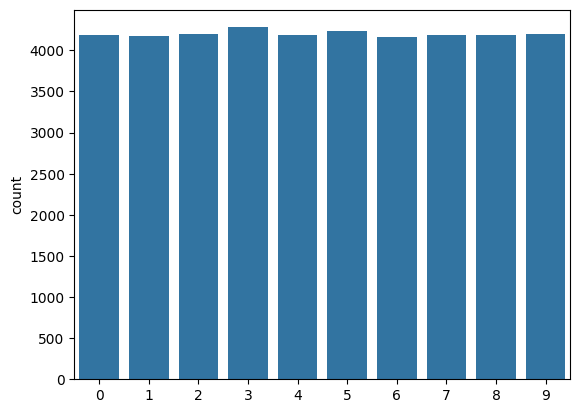

In [67]:
# Plot distribution of each category
count_plot = sns.countplot(x=y_train)

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [61]:
X_train[0].shape  # shape of first image

(32, 32)

In [62]:
X_train[0]  # array of pixels in the first image

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

### **Normalize the train and the test data**

In [68]:
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0

Print the shapes of Training and Test data

In [70]:
X_train_norm.shape, X_test_norm.shape

((42000, 32, 32), (18000, 32, 32))

### **One-hot encode output**

In [65]:
# create one-hot encoded vectors for the target variable

y_train_encoded = to_categorical(y_train)

y_test_encoded = to_categorical(y_test)

In [66]:
y_train_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
1. each of the X_train and X_test array of pixels was normalized by dividing by 255, so all pixel values are between 0 and 1
2. training and testing labels have been One Hot encoded, i.e. they were changed from single digit to an array of length 10, with the value at index equal to label set to 1, and all others set to 0
3. the number of samples for each category/label is similar, there are no imbalances present in the training data set

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [72]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [73]:
# Initialize a sequential model
model_1 = Sequential()
# Adding Flatten layer
model_1.add(Flatten(input_shape = (32, 32)))
# Dense Layers
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(32, activation = 'relu'))
model_1.add(Dense(10, activation = 'softmax'))

In [75]:
# Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [76]:
nn_model_1 = model_1

In [79]:
nn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
hist_nn_model_1 =nn_model_1.fit(X_train_norm, y_train_encoded,
          validation_split=0.2,
          epochs=20,
          batch_size=128,verbose=1)

Epoch 1/20
263/263 [==============================] - 3s 5ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3593 - accuracy: 0.5566 - val_loss: 1.3259 - val_accuracy: 0.5749
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.2905 - accuracy: 0.5834 - val_loss: 1.2542 - val_accuracy: 0.6012
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [82]:
# Capturing learning history per epoch
hist_1  = pd.DataFrame(hist_nn_model_1.history)
hist_1['epoch'] = hist_nn_model_1.epoch
hist_1.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.293355,0.123274,2.232415,0.174405,0
1,2.077405,0.250923,1.931829,0.308929,1
2,1.867928,0.340536,1.777890,0.386905,2
3,1.657313,0.439107,1.528800,0.490714,3
4,1.463534,0.518006,1.420237,0.525476,4


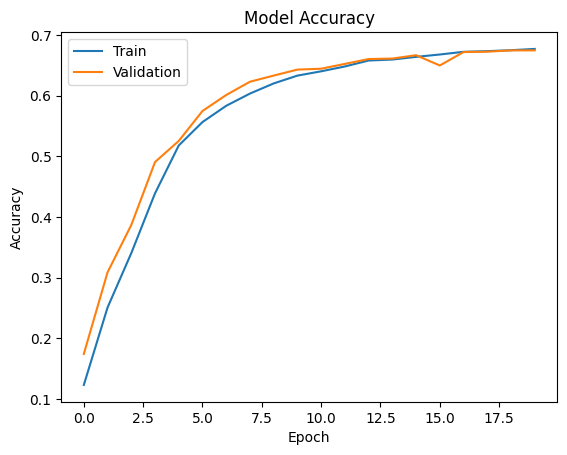

In [86]:
# Plotting accuracy at different epochs
plt.plot(hist_1['accuracy'])
plt.plot(hist_1['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
1. Model has performed similarly on both train and validation set
2. Model performance is not very good with accuracy reaching almost 68% after 20 epochs

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [99]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [100]:
# Initialize a sequential model
nn_model_2 = Sequential()
# Adding Flatten layer
nn_model_2.add(Flatten(input_shape = (32, 32)))
# Dense Layers
nn_model_2.add(Dense(256, activation = 'relu'))
nn_model_2.add(Dense(128, activation = 'relu'))
# add dropout
nn_model_2.add(Dropout(0.2))
# more dense layers
nn_model_2.add(Dense(64, activation = 'relu'))
nn_model_2.add(Dense(64, activation = 'relu'))
nn_model_2.add(Dense(32, activation = 'relu'))
# batch normalization
nn_model_2.add(BatchNormalization())
# output layer
nn_model_2.add(Dense(10, activation = 'softmax'))

In [101]:
opt = Adam(learning_rate = 0.0005)

In [102]:
nn_model_2.compile(optimizer = opt, loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [103]:
nn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2

In [104]:
hist_nn_model_2 = nn_model_2.fit(X_train_norm, y_train_encoded,
          validation_split=0.2,
          epochs=30,
          batch_size=128,verbose=1)

Epoch 1/30
263/263 [==============================] - 5s 8ms/step - loss: 2.3300 - accuracy: 0.1007 - val_loss: 2.3138 - val_accuracy: 0.0967
Epoch 2/30
263/263 [==============================] - 1s 5ms/step - loss: 2.3042 - accuracy: 0.1028 - val_loss: 2.3015 - val_accuracy: 0.1100
Epoch 3/30
263/263 [==============================] - 1s 5ms/step - loss: 2.1578 - accuracy: 0.1819 - val_loss: 2.0076 - val_accuracy: 0.2627
Epoch 4/30
263/263 [==============================] - 1s 5ms/step - loss: 1.6188 - accuracy: 0.4376 - val_loss: 1.4725 - val_accuracy: 0.5079
Epoch 5/30
263/263 [==============================] - 1s 5ms/step - loss: 1.3587 - accuracy: 0.5480 - val_loss: 1.2387 - val_accuracy: 0.6042
Epoch 6/30
263/263 [==============================] - 2s 6ms/step - loss: 1.2342 - accuracy: 0.5973 - val_loss: 1.1264 - val_accuracy: 0.6396
Epoch 7/30
263/263 [==============================] - 2s 7ms/step - loss: 1.1481 - accuracy: 0.6307 - val_loss: 1.0631 - val_accuracy: 0.6620
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [105]:
# Capturing learning history per epoch
hist_2  = pd.DataFrame(hist_nn_model_2.history)
hist_2['epoch'] = hist_nn_model_2.epoch
hist_2.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.330043,0.100744,2.313770,0.096667,0
1,2.304195,0.102798,2.301535,0.110000,1
2,2.157802,0.181935,2.007631,0.262738,2
3,1.618777,0.437560,1.472471,0.507857,3
4,1.358668,0.547976,1.238676,0.604167,4


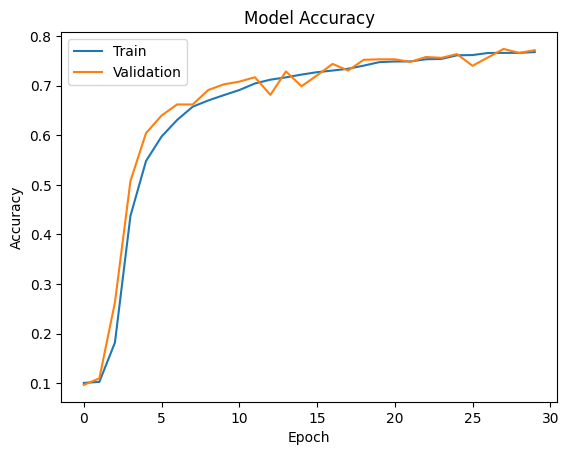

In [106]:
# Plotting accuracy at different epochs
plt.plot(hist_2['accuracy'])
plt.plot(hist_2['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
1. Similarly to model 1, model 2 achieved similar accuracy on both training and validation sets
2. performance has improved a little bit, with accuracy going up to around 77%
3. model performace is not satisfactory

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [108]:
y_pred_nn2 = nn_model_2.predict(X_test_norm)
y_pred_nn2

563/563 [==============================] - 2s 3ms/step


array([[3.0460605e-01, 5.8522869e-02, 3.8579933e-02, ..., 2.1879179e-02,
        2.3449135e-01, 1.0369486e-01],
       [3.5049903e-04, 1.2768924e-03, 5.4319781e-01, ..., 4.3431443e-01,
        6.6564750e-04, 9.2608773e-04],
       [2.1961748e-04, 5.0032698e-04, 9.9090892e-01, ..., 9.4840187e-04,
        5.7518709e-04, 4.5433055e-04],
       ...,
       [4.1146253e-05, 1.3349913e-02, 2.3719294e-03, ..., 9.7772938e-01,
        3.2191531e-04, 1.2329023e-04],
       [7.0760897e-03, 5.5670068e-03, 1.5969662e-02, ..., 1.0103194e-02,
        7.7600107e-02, 6.7690700e-01],
       [3.3004527e-04, 1.3083946e-04, 9.9263376e-01, ..., 3.2548881e-03,
        2.7540597e-04, 4.5480634e-04]], dtype=float32)

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [109]:
y_pred_nn2 = np.argmax(y_pred_nn2, axis = -1)
y_pred_nn2

array([0, 2, 2, ..., 7, 9, 2])

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [110]:
def metrics_score(actual, predicted):

    from sklearn.metrics import classification_report

    from sklearn.metrics import confusion_matrix

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = class_names_list, yticklabels = class_names_list)

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1814
           1       0.81      0.80      0.80      1828
           2       0.83      0.76      0.80      1803
           3       0.67      0.76      0.71      1719
           4       0.80      0.83      0.81      1812
           5       0.75      0.70      0.73      1768
           6       0.67      0.81      0.73      1832
           7       0.82      0.82      0.82      1808
           8       0.70      0.73      0.72      1812
           9       0.81      0.72      0.76      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



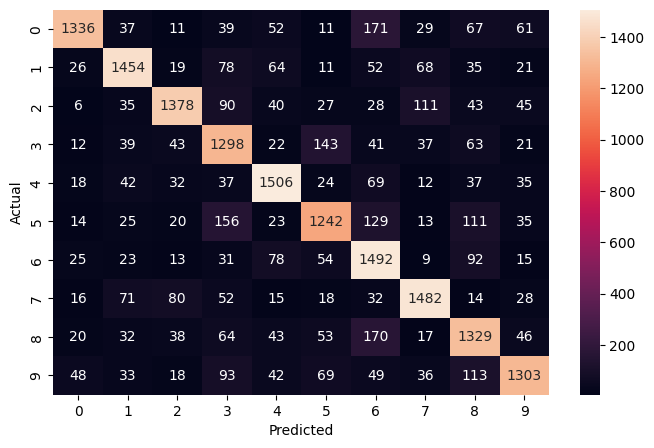

In [111]:
metrics_score(y_test,y_pred_nn2 )

**Final Observations:**
1. both model's recall and precision scores are low
2. this indicates the model is lacking the capacity to capture the number patterns
3. the model is misclassifying lots of cases
4. the most common misclassiifcations are, with over 100 misclassifications are:
* 0 classified as 6
* 2 classified as 7
* 3 classified as 5
* 5 classified as 3  
* 5 classified as 6
* 5 classified as 8
* 8 classified as 6
* 9 classified as 8

It would be beneficial to enhance the model and check if that improves performnce.

















## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [112]:
# Load the .h5 file
file_path = '/content/SVHN_single_grey1.h5'

def print_attrs(name, obj):
    if isinstance(obj, h5py.Dataset):
      print(name)

with h5py.File(file_path, 'r') as hf:
    # hf.visititems(print_attrs)

    X_train = hf['X_train']
    X_train = X_train[:]
    X_test = hf['X_test']
    X_test = X_test[:]
    X_val = hf['X_val']
    X_val = X_val[:]

    y_train = hf['y_train']
    y_train = y_train[:]
    y_test = hf['y_test']
    y_test = y_test[:]
    y_val = hf['y_val']
    y_val = y_val[:]



Check the number of images in the training and the testing dataset.

In [114]:
X_train.shape[0], X_test.shape[0]

(42000, 18000)

**Observation:**
1. There are 42000 images in training set
2. There are 18000 images in testing set


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [116]:
# Print the shape and the array of pixels for the first image in the training dataset
X_train[0].shape, X_train[0]

((32, 32),
 array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
       dtype=float32))

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [120]:
# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))
X_train.shape, X_test.shape

((42000, 32, 32, 1), (18000, 32, 32, 1))

Normalize inputs from 0-255 to 0-1

In [121]:
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0


Print New shape of Training and Test

In [123]:
X_train_norm.shape, X_train_norm.shape

((42000, 32, 32, 1), (42000, 32, 32, 1))

### **One-hot encode the labels in the target variable y_train and y_test.**

In [126]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


**Observation:**
1. there are 42000 images of SVHN in the training data set
2. there are 18000 images of SVHN in the testing data set
3. image size is 32 by 32 pixels
4. images are labeled into 10 categories: numbers from 0 - 9
5. each of the X_train and X_test array of pixels was normalized by dividing by 255, so all pixel values are between 0 and 1
6. training and testing labels have been One Hot encoded, i.e. they were changed from single digit to an array of length 10, with the value at index equal to label set to 1, and all others set to 0

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [127]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [128]:
# Intializing a sequential model
cnn_model_1 = Sequential()

# Adding first conv layer with 16 filters and kernel size 3x3 , padding = 'same'
cnn_model_1.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))
# adding leaky relu with slope 0.1
cnn_model_1.add(LeakyReLU(alpha=0.1))
# Adding second conv layer with 32 filters and kernel size 3x3 , padding = 'same'
cnn_model_1.add(Conv2D(32, (3, 3), padding="same"))
# adding leaky relu with slope 0.1
cnn_model_1.add(LeakyReLU(alpha=0.1))

# Adding max pooling to reduce the size of output
cnn_model_1.add(MaxPooling2D((2, 2), padding = 'same'))


# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
cnn_model_1.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
cnn_model_1.add(Dense(32))
# adding leaky relu with slope 0.1
cnn_model_1.add(LeakyReLU(alpha=0.1))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
cnn_model_1.add(Dense(10, activation='softmax'))


In [129]:
cnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [131]:
# Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'

cnn_model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])


In [132]:
hist_cnn_model_1 = cnn_model_1.fit(X_train_norm, y_train_encoded,
          validation_split=0.2,
          epochs=20,
          batch_size=32,verbose=1)

Epoch 1/20
1050/1050 [==============================] - 8s 5ms/step - loss: 1.1142 - accuracy: 0.6381 - val_loss: 0.6494 - val_accuracy: 0.8126
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5463 - accuracy: 0.8449 - val_loss: 0.5310 - val_accuracy: 0.8493
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4549 - accuracy: 0.8656 - val_loss: 0.5151 - val_accuracy: 0.8567
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3917 - accuracy: 0.8858 - val_loss: 0.4507 - val_accuracy: 0.8748
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3421 - accuracy: 0.8983 - val_loss: 0.4750 - val_accuracy: 0.8692
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3062 - accuracy: 0.9080 - val_loss: 0.4595 - val_accuracy: 0.8763
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2729 - accuracy: 0.9174 - val_loss: 0.4548 - val_accuracy:

### **Plot the Training and Validation Accuracies and Write your observations.**

In [133]:
# Capturing learning history per epoch
hist_3  = pd.DataFrame(hist_cnn_model_1.history)
hist_3['epoch'] = hist_cnn_model_1.epoch
hist_3.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.114217,0.638125,0.649438,0.812619,0
1,0.546332,0.844851,0.530994,0.849286,1
2,0.454887,0.865565,0.515072,0.856667,2
3,0.391696,0.885833,0.450698,0.874762,3
4,0.342132,0.898333,0.475016,0.869167,4


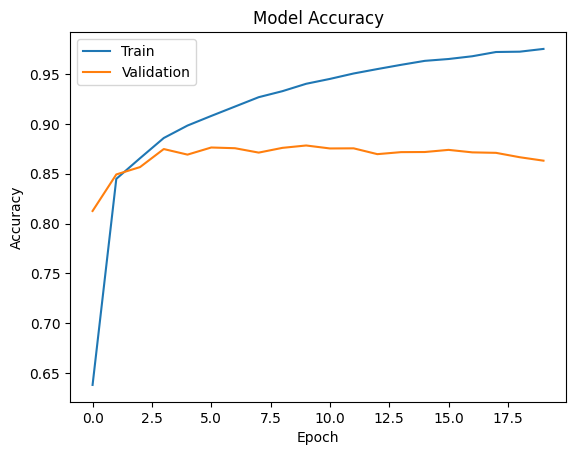

In [134]:
# Plotting accuracy at different epochs
plt.plot(hist_3['accuracy'])
plt.plot(hist_3['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
1. model has achieved accuracy reaching 97% on training set
2. however accuracy on the test set is significantly lower around 86% suggesting that model might be overfitting

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [135]:
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [136]:
# Intializing a sequential model
cnn_model_2 = Sequential()

# Adding first conv layer with 16 filters and kernel size 3x3 , padding = 'same'
cnn_model_2.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))
# adding leaky relu with slope 0.1
cnn_model_2.add(LeakyReLU(alpha=0.1))
# Adding second conv layer with 32 filters and kernel size 3x3 , padding = 'same'
cnn_model_2.add(Conv2D(32, (3, 3), padding="same"))
# adding leaky relu with slope 0.1
cnn_model_2.add(LeakyReLU(alpha=0.1))

# Adding max pooling to reduce the size of output
cnn_model_2.add(MaxPooling2D((2, 2), padding = 'same'))

# adding batch normalization layer
cnn_model_2.add(BatchNormalization())

# Adding third conv layer with 32 filters and kernel size 3x3 , padding = 'same'
cnn_model_2.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 1)))
# adding leaky relu with slope 0.1
cnn_model_2.add(LeakyReLU(alpha=0.1))
# Adding forth conv layer with 64 filters and kernel size 3x3 , padding = 'same'
cnn_model_2.add(Conv2D(64, (3, 3), padding="same"))
# adding leaky relu with slope 0.1
cnn_model_2.add(LeakyReLU(alpha=0.1))

# Adding max pooling to reduce the size of output
cnn_model_2.add(MaxPooling2D((2, 2), padding = 'same'))

# adding batch normalization layer
cnn_model_2.add(BatchNormalization())


# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
cnn_model_2.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
cnn_model_2.add(Dense(32))
# adding leaky relu with slope 0.1
cnn_model_2.add(LeakyReLU(alpha=0.1))
# add dropout layer
cnn_model_2.add(Dropout(0.5))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
cnn_model_2.add(Dense(10, activation='softmax'))

In [137]:
# Compile the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'

cnn_model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])


In [138]:
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [139]:
hist_cnn_model_2 = cnn_model_2.fit(X_train_norm, y_train_encoded,
          validation_split=0.2,
          epochs=30,
          batch_size=128,verbose=1)

Epoch 1/30
263/263 [==============================] - 6s 13ms/step - loss: 1.3355 - accuracy: 0.5469 - val_loss: 1.8995 - val_accuracy: 0.4083
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 0.6653 - accuracy: 0.7956 - val_loss: 0.6587 - val_accuracy: 0.8227
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 0.5485 - accuracy: 0.8319 - val_loss: 0.4458 - val_accuracy: 0.8689
Epoch 4/30
263/263 [==============================] - 2s 9ms/step - loss: 0.4859 - accuracy: 0.8531 - val_loss: 0.3879 - val_accuracy: 0.8911
Epoch 5/30
263/263 [==============================] - 2s 9ms/step - loss: 0.4431 - accuracy: 0.8622 - val_loss: 0.3819 - val_accuracy: 0.8967
Epoch 6/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4047 - accuracy: 0.8774 - val_loss: 0.4167 - val_accuracy: 0.8755
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 0.3825 - accuracy: 0.8822 - val_loss: 0.3784 - val_accuracy: 0.8936
Epoc

### **Plot the Training and Validation accuracies and write your observations.**

In [142]:
# Capturing learning history per epoch
hist_4  = pd.DataFrame(hist_cnn_model_2.history)
hist_4['epoch'] = hist_cnn_model_2.epoch
hist_4.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.335464,0.546875,1.899545,0.408333,0
1,0.665338,0.795565,0.658689,0.822738,1
2,0.548472,0.831935,0.445828,0.868929,2
3,0.485934,0.853095,0.387929,0.891071,3
4,0.443110,0.862173,0.381920,0.896667,4


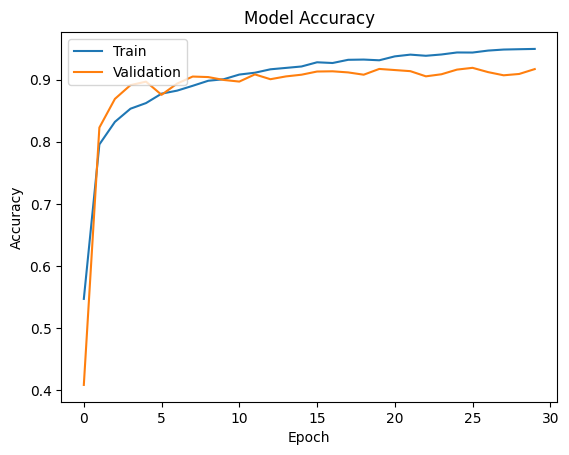

In [143]:
# Plotting accuracy at different epochs
plt.plot(hist_4['accuracy'])
plt.plot(hist_4['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
1. Model accuracy on training set has decrease slightly compared with the previous model
2. however generalization capabilty looks much better, as accuracy on the validation set increased significantlly, almost levelling training set accuracy

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [145]:
y_pred_cnn2 = cnn_model_2.predict(X_test_norm)
y_pred_cnn2

563/563 [==============================] - 1s 2ms/step


array([[3.90296662e-03, 9.93530095e-01, 4.65271660e-06, ...,
        2.59587076e-04, 1.52906450e-03, 3.25530054e-05],
       [2.73848406e-22, 4.41541070e-09, 7.15211996e-08, ...,
        9.99999881e-01, 1.26168570e-22, 8.56828454e-22],
       [2.31562348e-24, 1.90723679e-17, 1.00000000e+00, ...,
        8.77194774e-14, 1.10851769e-22, 7.89599673e-24],
       ...,
       [2.38728973e-15, 5.04857553e-07, 1.01763720e-09, ...,
        9.99999523e-01, 1.27042728e-14, 3.97099379e-15],
       [2.75774655e-04, 7.27979495e-05, 3.88337416e-03, ...,
        1.49841813e-04, 1.20554514e-01, 9.66626853e-02],
       [4.43152910e-11, 8.26932774e-06, 9.90043759e-01, ...,
        9.94795747e-03, 3.02886947e-13, 6.60837053e-13]], dtype=float32)

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [146]:
y_pred_cnn2 = np.argmax(y_pred_cnn2, axis = 1)
y_pred_cnn2

array([1, 7, 2, ..., 7, 3, 2])

In [147]:
y_pred_cnn2[7]

8

### **Write your final observations on the performance of the model on the test data.**

In [148]:
cnn_model_2.evaluate(X_test_norm, y_test_encoded)

563/563 [==============================] - 2s 3ms/step - loss: 0.4566 - accuracy: 0.9126


[0.45658060908317566, 0.9125555753707886]

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1814
           1       0.92      0.91      0.92      1828
           2       0.92      0.92      0.92      1803
           3       0.92      0.88      0.90      1719
           4       0.92      0.93      0.93      1812
           5       0.93      0.90      0.91      1768
           6       0.88      0.92      0.90      1832
           7       0.94      0.93      0.93      1808
           8       0.94      0.87      0.91      1812
           9       0.90      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



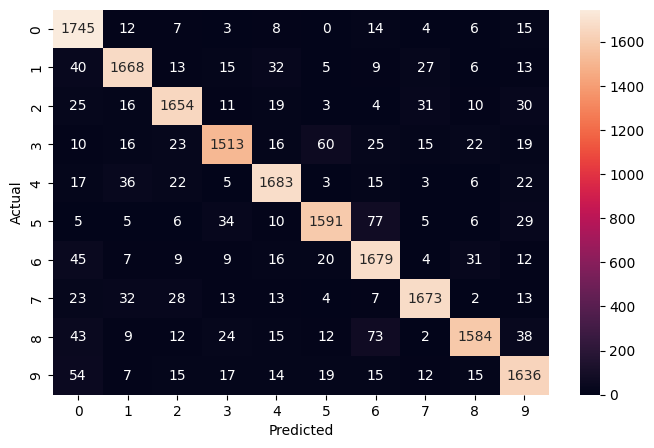

In [149]:
metrics_score(y_test,y_pred_cnn2 )

**Final Observations:**
1. second cnn_model is perfomaing by far best of all the above presented models
2. precision, recall and accuracy and much improved compared with second ann_model
3. meaning the model is much better at recognizing the definig features of each digit
4. however the model performance could be improved further, one good way could be increasing the training dataset population
